## Simplest Mapping

The simplest mapping we can think of is the case in which there is a one-dimensional hidden factor and a one-dimensional observation, with the labels being equal to the hidden factor. Moreover, there is a linear function that describes $x$ in terms of $h$. In math notation, $y = h$ and $x = ah + b$.

a:2.88, b:-1.35


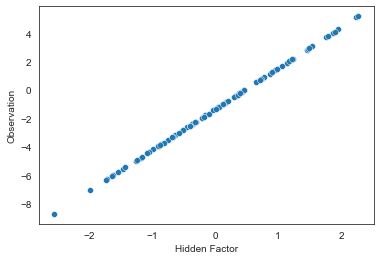

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

# Generate random hidden factors
hidden_factors = np.random.normal(0, 1, size=100)

# Create observations with random weight and bias
a, b = np.random.normal(1, 1), np.random.normal(0, 1)
observations = a * hidden_factors + b
print(f'a:{a:.2f}, b:{b:.2f}')

# Plot observations against hidden factors
sns.set_style('white')
sns.scatterplot(x=hidden_factors, y=observations)
plt.xlabel('Hidden Factor'); plt.ylabel('Observation')
plt.show()

## Applying Non-Linearity

A way of increasing complexity is by adding a non-linear function that wraps the original observation value. In other words, we use a function such that our observations are now defined by $x = g(ah + b)$, where $g$ is a non-linear function. The choice of function matters a lot and we will explore different alternatives in the future. For now, we use a sigmoid.

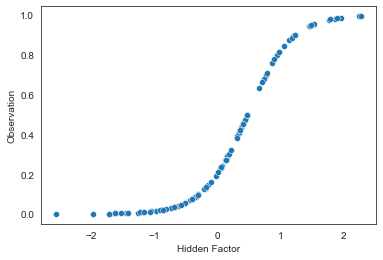

In [12]:
# Define the non-linear function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Re-create the observations with a new definition
observations = sigmoid(a * hidden_factors + b)

# Plot observations against hidden factors
sns.scatterplot(x=hidden_factors, y=observations)
plt.xlabel('Hidden Factor'); plt.ylabel('Observation')
plt.show()

## Adding Noise

A second tool we have for increasing the complexity of a data-generating process is adding noise to it. After the non-linearity is applied, we add a random gaussian value to the expression, leaving the definition of our observations as $x = g(ah + b) + n$. One core idea is that we can control the amount of noise added to the data and compare the performance of models in the dataset given different variations in the gaussian noise.

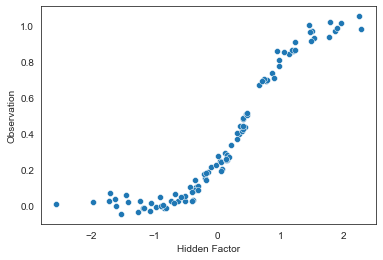

In [13]:
# Add noise to the observations
noise = np.random.normal(0, 0.03, size=100)
observations = observations + noise

# Plot observations against hidden factors
sns.scatterplot(x=hidden_factors, y=observations)
plt.xlabel('Hidden Factor'); plt.ylabel('Observation')
plt.show()

## Increasing Depth

Another possibility we have for increasing the non-linearity of our dataset is to embed together multiple non-linear functions. This means that we are consecutively applying non-linearities to our data and obtaining observations that are further apart from the hidden factors. In the example shown below, we follow our sigmoid function with the addition of a bias and a sine function. Note that the noise term is only added in the end.

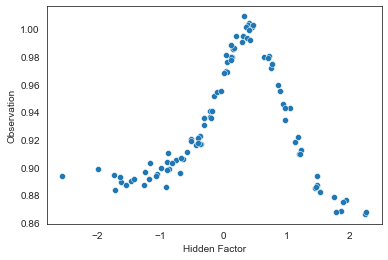

In [14]:
# Reset the noise in the data
observations = observations - noise

# Add a new bias to the observations
b_2 = np.random.normal(0, 1)
observations = observations + b_2

# Apply a sine function
observations = np.sin(observations)

# Redefine the noise vector and add to observations
noise = np.random.normal(0, 0.005, size=100)
observations = observations + noise

# Plot observations against hidden factors
sns.scatterplot(x=hidden_factors, y=observations)
plt.xlabel('Hidden Factor'); plt.ylabel('Observation')
plt.show()

## Increasing Dimensionality

Finally, we can increase the dimensionality of the data by having multiple hidden factors and high-dimensional observations. For the sake of this example, we will keep both factors and observations 2-dimensional. To define the new label, we will just define a vector $[1, 1]^\top$ that can be dotted with $h$ to obtain $y$. The observations are now defined as $x_i = g(w_i \cdot h + b_i$), where $w_i$ is a weight vector.

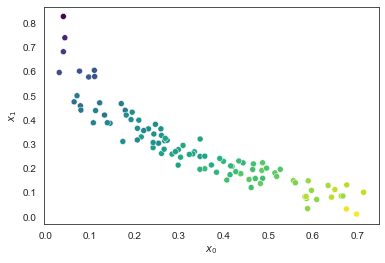

In [15]:
# Generate random hidden factors
hidden_factors = np.random.normal(0, 1, size=(2, 100))

# Create the vector with labels
labels = (np.ones((1, 2)) @ hidden_factors).reshape(100,)

# Create empty observations vector
observations = np.zeros((2, 100))

# For each observation we calculate its value with random weights and bias
for i in range(observations.shape[0]):
    weights = np.random.normal(1, 1, size=(1, 2))
    bias = np.random.normal(0, 1)
    observations[i] = sigmoid(weights @ hidden_factors + bias)

# Add noise to the observations
noise = np.random.normal(0, 0.03, size=(2, 100))
observations = observations + noise

# Plot observations against hidden factors
viridis_map = sns.color_palette('viridis', as_cmap=True)
sns.scatterplot(x=observations[0], y=observations[1], hue=labels,
                palette=viridis_map).get_legend().remove()
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
plt.show()